In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1
from matplotlib import colormaps
from matplotlib.collections import LineCollection


In [16]:
session = fastf1.get_session(2024, 'Canada', 'Qualifying', backend='f1timing')
session.load()


req            INFO 	Using cached data for season_schedule


core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.3.7]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading dat

In [17]:
df_info = session.session_info

In [19]:
df_results = session.results
drivers_names = df_results['Abbreviation']

df_results


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
63,63,G RUSSELL,RUS,,Mercedes,27F4D2,,George,Russell,George Russell,...,GBR,1.0,,NaN,0 days 00:01:13.013000,0 days 00:01:11.742000,0 days 00:01:12,NaT,,NaN
1,1,M VERSTAPPEN,VER,,Red Bull Racing,3671C6,,Max,Verstappen,Max Verstappen,...,NED,2.0,,NaN,0 days 00:01:12.360000,0 days 00:01:12.549000,0 days 00:01:12,NaT,,NaN
4,4,L NORRIS,NOR,,McLaren,FF8000,,Lando,Norris,Lando Norris,...,GBR,3.0,,NaN,0 days 00:01:12.959000,0 days 00:01:12.201000,0 days 00:01:12.021000,NaT,,NaN
81,81,O PIASTRI,PIA,,McLaren,FF8000,,Oscar,Piastri,Oscar Piastri,...,AUS,4.0,,NaN,0 days 00:01:12.907000,0 days 00:01:12.462000,0 days 00:01:12.103000,NaT,,NaN
3,3,D RICCIARDO,RIC,,RB,6692FF,,Daniel,Ricciardo,Daniel Ricciardo,...,AUS,5.0,,NaN,0 days 00:01:13.240000,0 days 00:01:12.572000,0 days 00:01:12.178000,NaT,,NaN
14,14,F ALONSO,ALO,,Aston Martin,229971,,Fernando,Alonso,Fernando Alonso,...,ESP,6.0,,NaN,0 days 00:01:13.117000,0 days 00:01:12.635000,0 days 00:01:12.228000,NaT,,NaN
44,44,L HAMILTON,HAM,,Mercedes,27F4D2,,Lewis,Hamilton,Lewis Hamilton,...,GBR,7.0,,NaN,0 days 00:01:12.851000,0 days 00:01:11.979000,0 days 00:01:12.280000,NaT,,NaN
22,22,Y TSUNODA,TSU,,RB,6692FF,,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,8.0,,NaN,0 days 00:01:12.748000,0 days 00:01:12.303000,0 days 00:01:12.414000,NaT,,NaN
18,18,L STROLL,STR,,Aston Martin,229971,,Lance,Stroll,Lance Stroll,...,CAN,9.0,,NaN,0 days 00:01:13.088000,0 days 00:01:12.659000,0 days 00:01:12.701000,NaT,,NaN
23,23,A ALBON,ALB,,Williams,64C4FF,,Alexander,Albon,Alexander Albon,...,THA,10.0,,NaN,0 days 00:01:12.896000,0 days 00:01:12.485000,0 days 00:01:12.796000,NaT,,NaN


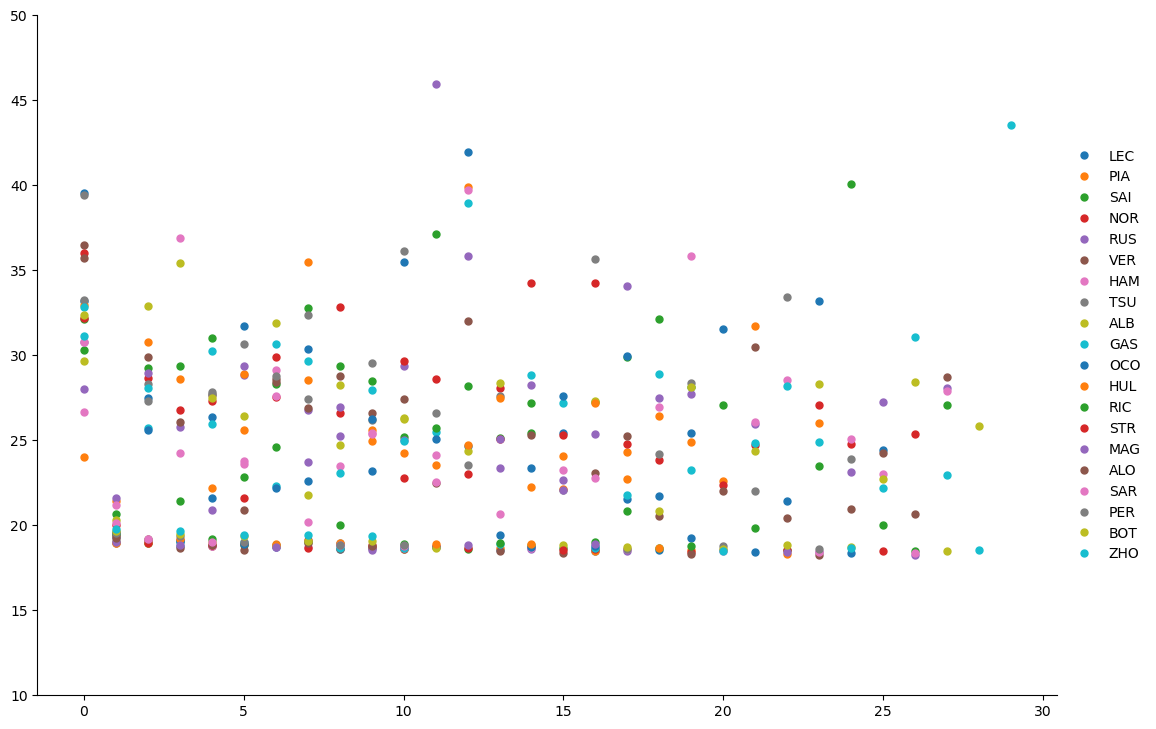

In [6]:
df_laps = session.laps

fig = plt.figure(figsize=(12,8))
ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([10, 50])

best_sector1 = []

for i, idriver in enumerate(drivers_names):

    df_temp =  df_laps[df_laps['Driver']==idriver][['Sector1Time', 'Sector2Time', 'Sector3Time']]
    df_temp['Sector1TimeSeconds'] = df_temp['Sector1Time'].apply(lambda x: x.total_seconds())
    
    data_sector1 = df_temp['Sector1TimeSeconds']

    best_sector1.append(np.min(data_sector1))

    x_data = np.arange(len(data_sector1))
    ax.plot(x_data, data_sector1, label=idriver, ls='-', marker='.', markersize=10, lw=0)
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))



#df_temp

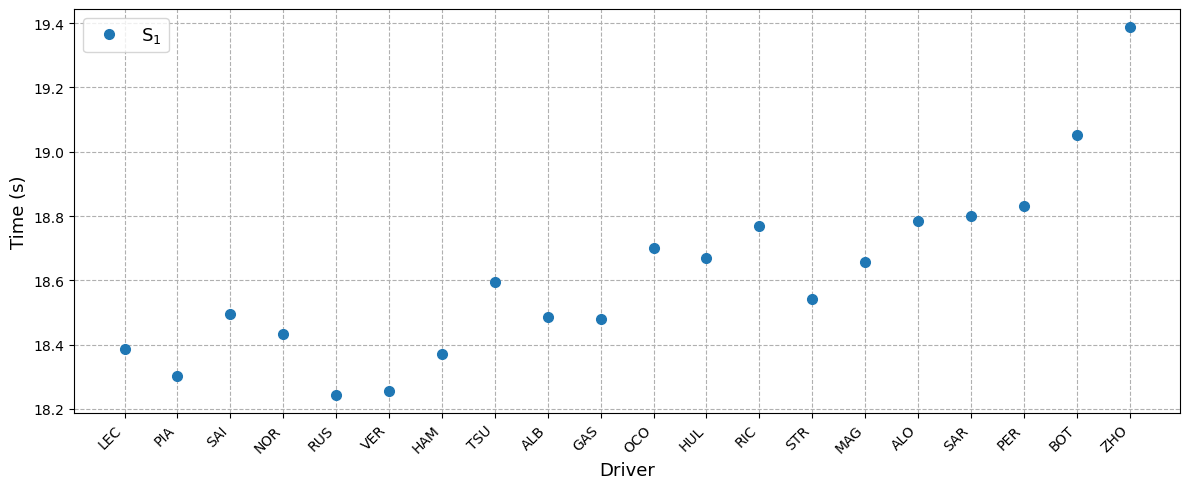

In [15]:
fig = plt.figure(figsize=(12,5))
ax  = fig.add_subplot(111)
fig.autofmt_xdate(rotation=45)
ax.plot(drivers_names,best_sector1,'o',markersize=7,label=r'S$_{1}$')
ax.set_xlabel(r'Driver', fontsize=13)
ax.set_ylabel(r'Time (s)', fontsize=13)
ax.grid(linestyle='--')
ax.legend(loc='best',fontsize=13)
fig.tight_layout()

In [103]:
print(drivers_names)

16    LEC
81    PIA
55    SAI
4     NOR
63    RUS
1     VER
44    HAM
22    TSU
23    ALB
10    GAS
31    OCO
27    HUL
3     RIC
18    STR
20    MAG
14    ALO
2     SAR
11    PER
77    BOT
24    ZHO
Name: Abbreviation, dtype: object


In [22]:
# Map lap plot

session = fastf1.get_session(2024, 'Monaco', 'Q')
session.load()

session

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  3: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '27', '3', '18', '20', '14', '2', '11', '77', '24']


2024 Season Round 8: Monaco Grand Prix - Qualifying

In [34]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
vel = tel['Speed'].to_numpy().astype(float)

In [37]:
np.min(vel)


46.0

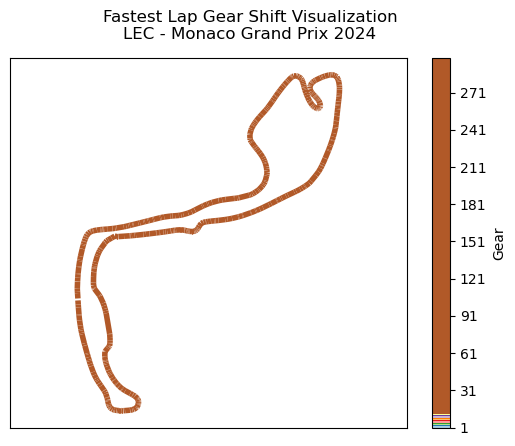

In [44]:
cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

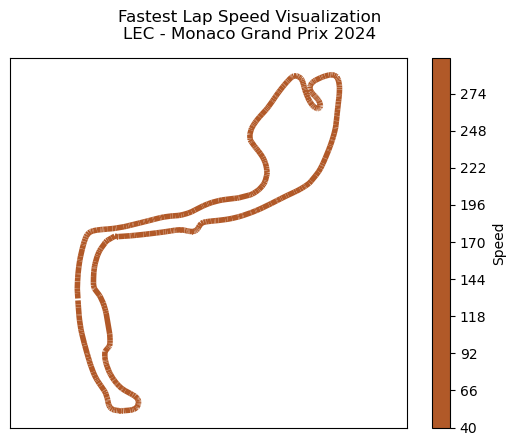

In [43]:
cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(vel)
lc_comp.set_linewidth(4)

plt.figure(123)
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Speed Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Speed",
                    boundaries=np.arange(40, 300))
#cbar.set_ticks(np.arange(1.5, 9.5))
#cbar.set_ticklabels(np.arange(1, 9))


plt.show()

In [47]:
lc_comp.get_array()

masked_array(data=[277., 278., 280., 281., 283., 284., 285., 286., 286.,
                   286., 286., 278., 270., 239., 209., 197., 186., 176.,
                   166., 156., 147., 139., 136., 134., 125., 122., 120.,
                   118., 117., 117., 118., 119., 121., 125., 130., 135.,
                   143., 151., 161., 164., 167., 170., 174., 178., 189.,
                   200., 204., 208., 212., 213., 215., 219., 224., 226.,
                   229., 230., 232., 234., 236., 239., 241., 243., 246.,
                   248., 250., 251., 252., 254., 257., 257., 258., 259.,
                   260., 262., 264., 264., 265., 266., 269., 269., 269.,
                   270., 270., 271., 272., 252., 248., 245., 233., 221.,
                   216., 211., 205., 199., 196., 194., 189., 185., 181.,
                   179., 175., 171., 172., 173., 173., 174., 175., 177.,
                   180., 183., 184., 185., 181., 178., 172., 167., 163.,
                   163., 158., 153., 148., 149., 15